In [298]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sb

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/polymer.csv


Loading The Dataset

In [299]:
polymer = pd.read_csv("../input/polymer.csv")

In [300]:
polymer.head()

,log(shear rate) in s^-1,Polymer conc(wt%),NaCl concentration(wt%),Ca+2 concentration(wt%),Temperature(in celsius),log(viscosity) in cP
0,0.010415,0.3,0.1,0.0,25,2309.56
1,0.022561,0.3,0.1,0.0,25,2298.77
2,0.048870,0.3,0.1,0.0,25,2288.02
3,0.101641,0.3,0.1,0.0,25,1981.19
4,0.220169,0.3,0.1,0.0,25,1715.09


In [301]:
polymer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
log(shear rate) in s^-1    420 non-null float64
Polymer conc(wt%)          420 non-null float64
NaCl concentration(wt%)    420 non-null float64
Ca+2 concentration(wt%)    420 non-null float64
Temperature(in celsius)    420 non-null int64
log(viscosity) in cP       420 non-null float64
dtypes: float64(5), int64(1)
memory usage: 19.8 KB


In [302]:
#Rows_and_Columns_of_Dataset
polymer.shape

(420, 6)

In [303]:
#Column_Description
polymer.columns

Index(['log(shear rate) in s^-1', 'Polymer conc(wt%)',
       'NaCl concentration(wt%)', 'Ca+2 concentration(wt%)',
       'Temperature(in celsius)', 'log(viscosity) in cP'],
      dtype='object')

In [304]:
(polymer.describe(include='all')).transpose()

,count,mean,std,min,25%,50%,75%,max
log(shear rate) in s^-1,420.0,16.241228,29.263016,0.00960,0.098586,1.03308,20.729975,111.69
Polymer conc(wt%),420.0,0.215000,0.091533,0.05000,0.100000,0.20000,0.300000,0.30
NaCl concentration(wt%),420.0,1.540000,1.458583,0.10000,0.500000,1.00000,2.000000,4.00
Ca+2 concentration(wt%),420.0,0.030000,0.051051,0.00000,0.000000,0.00000,0.050000,0.15
Temperature(in celsius),420.0,29.500000,14.471188,25.00000,25.000000,25.00000,25.000000,90.00
log(viscosity) in cP,420.0,72.906273,253.742485,2.49948,11.713900,19.13195,34.071800,2309.56


In [305]:
#to see the missing value percent
missing_data=polymer.isna()
missing_data=missing_data.sum()
missing_data_percent=missing_data/len(polymer)*100
print(missing_data_percent)

log(shear rate) in s^-1    0.0
Polymer conc(wt%)          0.0
NaCl concentration(wt%)    0.0
Ca+2 concentration(wt%)    0.0
Temperature(in celsius)    0.0
log(viscosity) in cP       0.0
dtype: float64


In [306]:
polymer.nunique()

log(shear rate) in s^-1    349
Polymer conc(wt%)            4
NaCl concentration(wt%)      5
Ca+2 concentration(wt%)      4
Temperature(in celsius)      4
log(viscosity) in cP       331
dtype: int64

In [307]:
polymer['Polymer conc(wt%)'].value_counts()

0.30    196
0.20    112
0.10     70
0.05     42
Name: Polymer conc(wt%), dtype: int64

In [308]:
polymer['NaCl concentration(wt%)'].value_counts()

1.0    140
0.1     98
4.0     98
2.0     42
0.5     42
Name: NaCl concentration(wt%), dtype: int64

In [309]:
polymer['Ca+2 concentration(wt%)'].value_counts()

0.00    294
0.10     42
0.05     42
0.15     42
Name: Ca+2 concentration(wt%), dtype: int64

In [310]:
polymer['Temperature(in celsius)'].value_counts()

25    378
90     14
70     14
50     14
Name: Temperature(in celsius), dtype: int64

In [311]:
pearsoncorr = polymer.corr(method='pearson',min_periods=1)
pearsoncorr

,log(shear rate) in s^-1,Polymer conc(wt%),NaCl concentration(wt%),Ca+2 concentration(wt%),Temperature(in celsius),log(viscosity) in cP
log(shear rate) in s^-1,1.000000,-0.022019,-0.039555,-0.040200,-0.032548,-0.119645
Polymer conc(wt%),-0.022019,1.000000,0.018019,0.547008,-0.051081,0.151755
NaCl concentration(wt%),-0.039555,0.018019,1.000000,0.064616,-0.115400,-0.195300
Ca+2 concentration(wt%),-0.040200,0.547008,0.064616,1.000000,-0.183173,-0.126237
Temperature(in celsius),-0.032548,-0.051081,-0.115400,-0.183173,1.000000,-0.072043
log(viscosity) in cP,-0.119645,0.151755,-0.195300,-0.126237,-0.072043,1.000000


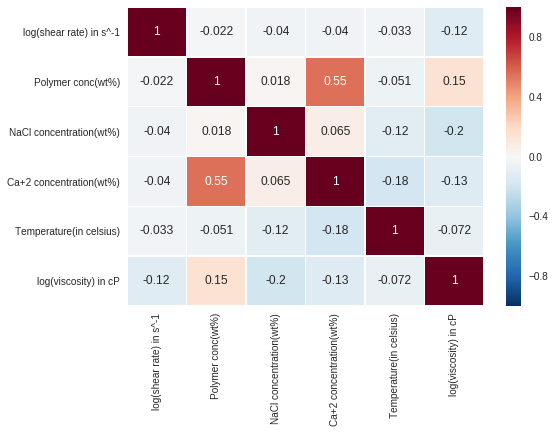

In [312]:
#ax = plt.subplots(figsize=(6,5))
sb.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns,
            vmin=-1, vmax=1, center=0, cmap='RdBu_r', annot=True, linewidth=0.5)
plt.show()

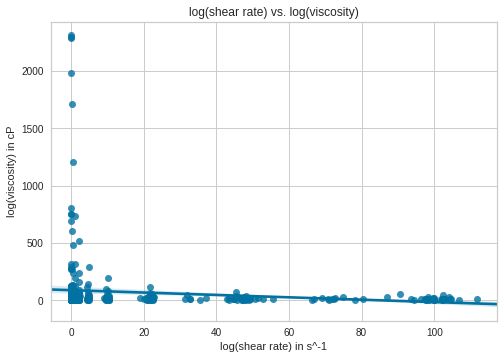

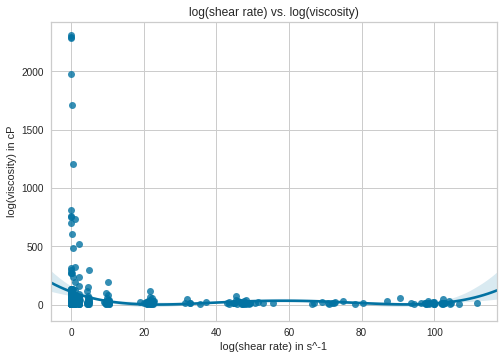

In [313]:
# A scatter plot with a linear regression fit:
#plt.figure(figsize=(10,10))
sb.regplot(x=polymer["log(shear rate) in s^-1"], y=polymer["log(viscosity) in cP"], fit_reg=True)
plt.title("log(shear rate) vs. log(viscosity)")
plt.show();

# A scatter plot with a polynomial regression fit:
#plt.figure(figsize=(10,10))
sb.regplot(x=polymer["log(shear rate) in s^-1"], y=polymer["log(viscosity) in cP"], fit_reg=True, order=4)
plt.title("log(shear rate) vs. log(viscosity)")
plt.show()

#### Features -> X and Target -> y 

In [314]:
X = polymer.drop('log(viscosity) in cP',axis=1)
y = polymer['log(viscosity) in cP']

In [315]:
X.head()

,log(shear rate) in s^-1,Polymer conc(wt%),NaCl concentration(wt%),Ca+2 concentration(wt%),Temperature(in celsius)
0,0.010415,0.3,0.1,0.0,25
1,0.022561,0.3,0.1,0.0,25
2,0.048870,0.3,0.1,0.0,25
3,0.101641,0.3,0.1,0.0,25
4,0.220169,0.3,0.1,0.0,25


In [316]:
y.head()

0    2309.56
1    2298.77
2    2288.02
3    1981.19
4    1715.09
Name: log(viscosity) in cP, dtype: float64

### Train-Test Split

In [317]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (336, 5) (336,)
Test set: (84, 5) (84,)


### Normalise the data

In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [319]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression Model

In [320]:
from sklearn.linear_model import LinearRegression 
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)
yr_pred = lin_regressor.predict(X_test)

In [321]:
mse_test = mean_squared_error(y_test, yr_pred)
rmse_test = np.sqrt(mse_test)
#print(rmse_test)
yr_pred_train = lin_regressor.predict(X_train)
mse_train = mean_squared_error(y_train, yr_pred_train)
rmse_train = np.sqrt(mse_train)
#print(rmse_train)
print("Test Set R2-score: %f" % r2_score(y_test, yr_pred) )
print("Train Set R2-score: %f" % r2_score(y_train, yr_pred_train) )
print("Test Set RMSE score: %f" % np.sqrt(mean_squared_error(y_test, yr_pred)) )
print("Train Set RMSE score: %f" % np.sqrt(mean_squared_error(y_train, yr_pred_train)) )

Test Set R2-score: 0.169638
Train Set R2-score: 0.147393
Test Set RMSE score: 268.614978
Train Set RMSE score: 223.283495


[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

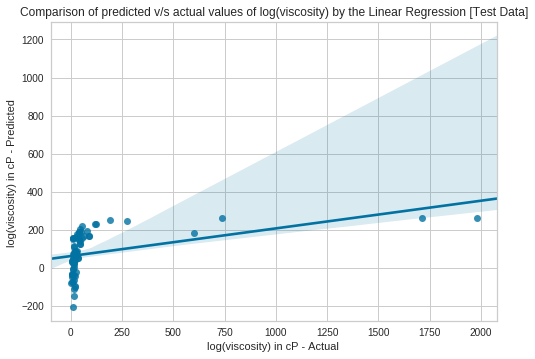

In [322]:
ax = sb.regplot(x=y_test,y=yr_pred)
ax.set_title('Comparison of predicted v/s actual values of log(viscosity) by the Linear Regression [Test Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

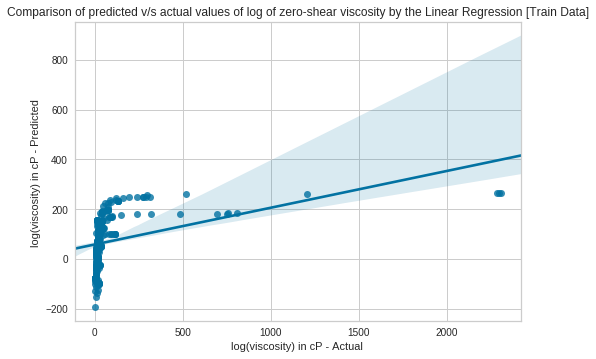

In [323]:
ax = sb.regplot(x=y_train,y=yr_pred_train)
ax.set_title('Comparison of predicted v/s actual values of log of zero-shear viscosity by the Linear Regression [Train Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

## Polynomial Regression

In [324]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
ypr_pred = lin2.predict(poly.fit_transform(X_test))

In [325]:
mse_test = mean_squared_error(y_test, ypr_pred)
rmse_test = np.sqrt(mse_test)
#print('rmse_test',rmse_test)
ypr_pred_train = lin2.predict(X_poly)
mse_train = mean_squared_error(y_train, ypr_pred_train)
rmse_train = np.sqrt(mse_train)
#print('rmse_train',rmse_train)
print("Test Set R2-score: %f" % r2_score(y_test, ypr_pred) )
print("Train Set R2-score: %f" % r2_score(y_train, ypr_pred_train) )
print("Test Set RMSE score: %f" % np.sqrt(mean_squared_error(y_test, ypr_pred)) )
print("Train Set RMSE score: %f" % np.sqrt(mean_squared_error(y_train, ypr_pred_train)) )

Test Set R2-score: 0.529310
Train Set R2-score: 0.711867
Test Set RMSE score: 202.238533
Train Set RMSE score: 129.801287


[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

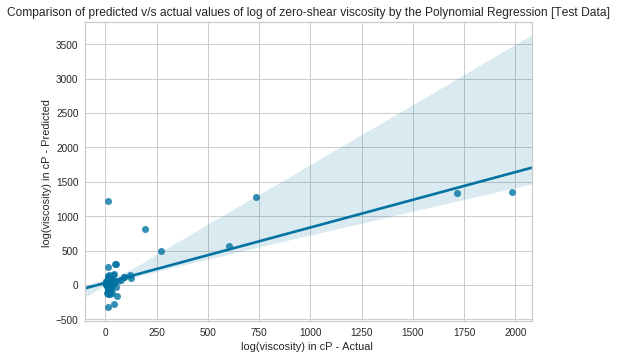

In [326]:
ax = sb.regplot(x=y_test,y=ypr_pred)
ax.set_title('Comparison of predicted v/s actual values of log of zero-shear viscosity by the Polynomial Regression [Test Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

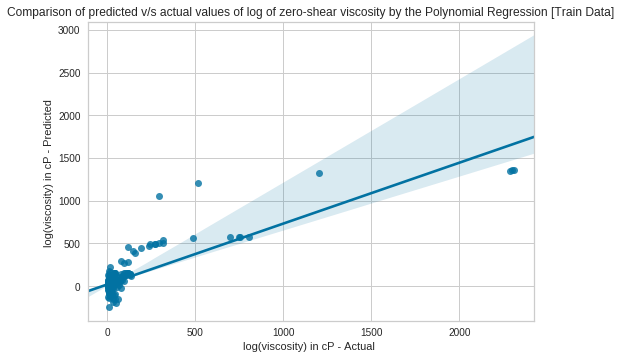

In [327]:
ax = sb.regplot(x=y_train,y=ypr_pred_train)
ax.set_title('Comparison of predicted v/s actual values of log of zero-shear viscosity by the Polynomial Regression [Train Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

## Artificial Neural Network Regressor Model

In [328]:
from sklearn.neural_network import MLPRegressor
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error
#mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='tanh', solver='sgd', max_iter=500, random_state=4)
for i in ['lbfgs', 'sgd', 'adam']:
    for j in ['logistic','tanh','relu']:
        mlp = MLPRegressor(hidden_layer_sizes=(7,7), activation=j, solver=i, max_iter=500, random_state=20)
        mlp.fit(X_train,y_train)
        predict_train = mlp.predict(X_train)
        predict_test = mlp.predict(X_test)
        r2_test = r2_score(y_test, predict_test)
        #rmse_test = np.sqrt(mean_squared_error(y_test, predict_test))
        print(i,j,r2_test)

lbfgs logistic 0.8292557433936848
lbfgs tanh 0.7302902847477568
lbfgs relu 0.9874394053687321
sgd logistic 0.44600465387074995
sgd tanh 0.07101522454295317
sgd relu -0.06751633654147171


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


adam logistic -0.07526107779240987


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


adam tanh -0.07221867132775972
adam relu 0.1446398704831353


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Final Neural Network Model

In [329]:
mlp1 = MLPRegressor(hidden_layer_sizes=(7,7), activation='relu', solver='lbfgs', max_iter=500, random_state=20)
mlp1.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(7, 7), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=20, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [330]:
predict_train = mlp1.predict(X_train)
predict_test = mlp1.predict(X_test)

### Evaluation

In [331]:
print("Train Set R2-score: %f" % r2_score(y_train, predict_train) )
print("Train Set RMSE score: %f" % np.sqrt(mean_squared_error(y_train, predict_train)) )
print("Test Set R2-score: %f" % r2_score(y_test, predict_test) )
print("Test Set RMSE score: %f" % np.sqrt(mean_squared_error(y_test, predict_test)) )

Train Set R2-score: 0.991167
Train Set RMSE score: 22.726115
Test Set R2-score: 0.987439
Test Set RMSE score: 33.037074


[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

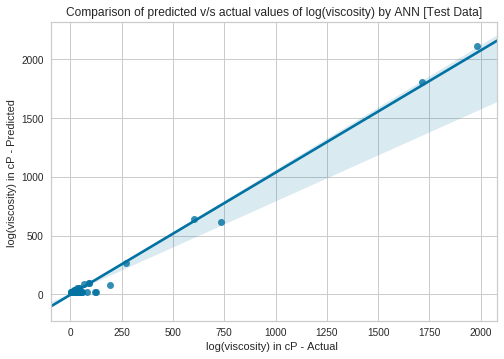

In [332]:
ax = sb.regplot(x=y_test,y=predict_test);
#plt.figure(figsize=(10,10))     
#sb.regplot(y_test, predict_test, fit_reg=True, scatter_kws={"s": 200})
ax.set_title('Comparison of predicted v/s actual values of log(viscosity) by ANN [Test Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

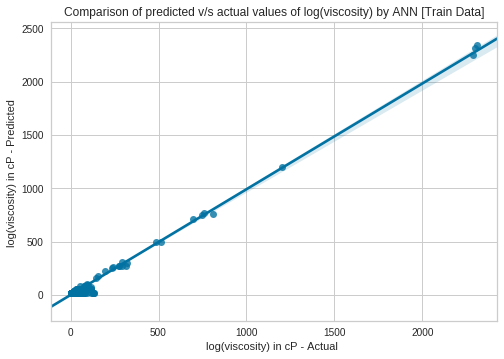

In [333]:
axb = sb.regplot(x=y_train, y=predict_train)
#plt.figure(figsize=(10,10))     
#sb.regplot(y_test, predict_test, fit_reg=True, scatter_kws={"s": 200})
axb.set_title('Comparison of predicted v/s actual values of log(viscosity) by ANN [Train Data]')
axb.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

In [334]:
#plt.scatter(y_test, predict_test)

## Random Forest Regressor Model

In [335]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import export_graphviz
from IPython import display

RF_Model = RandomForestRegressor(random_state=10)
RF_Model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [336]:
y_pred = RF_Model.predict(X_test)

In [337]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
#print('rmse_test:',rmse_test);
y_pred_train = RF_Model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
#print('rmse_train:',rmse_train)
print("Test Set R2-score: %f" % r2_score(y_test, y_pred) )
print("Train Set R2-score: %f" % r2_score(y_train, y_pred_train) )
print("Test Set RMSE score: %f" % np.sqrt(mean_squared_error(y_test, y_pred)) )
print("Train Set RMSE score: %f" % np.sqrt(mean_squared_error(y_train, y_pred_train)) )

Test Set R2-score: 0.876622
Train Set R2-score: 0.942151
Test Set RMSE score: 103.541804
Train Set RMSE score: 58.160773


In [338]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
feature_list=list(X.columns)
tree = RF_Model.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

The below code shows a tree of depth 3, just to show the understanding of decision trees.

In [339]:
# Limit depth of tree to 3 levels
#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf_small.fit(X_train, y_train)

# Extract the small tree
#tree_small = rf_small.estimators_[5]

# Save the tree as a png image
#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');

[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

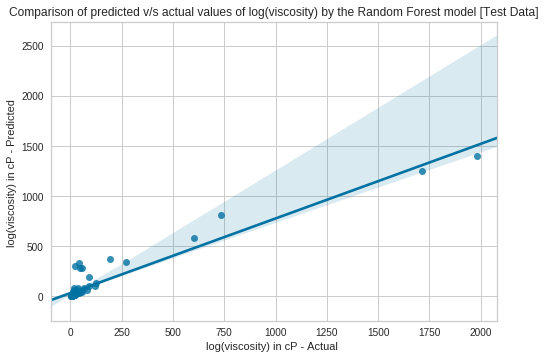

In [340]:
ax = sb.regplot(x=y_test,y=y_pred)
ax.set_title('Comparison of predicted v/s actual values of log(viscosity) by the Random Forest model [Test Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

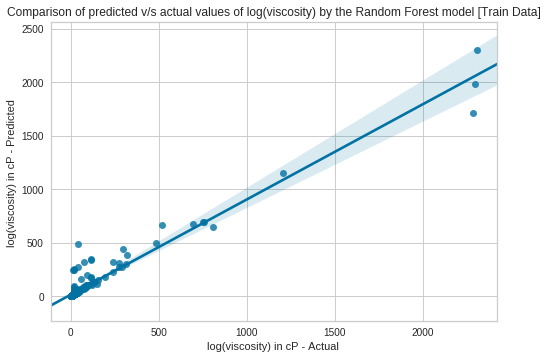

In [341]:
ax = sb.regplot(x=y_train,y=y_pred_train)
ax.set_title('Comparison of predicted v/s actual values of log(viscosity) by the Random Forest model [Train Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

## SVM MODEL

In [342]:
from sklearn.svm import SVR
# The most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 
# We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
for k in ['linear','poly','rbf','sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(X_train, y_train)
    r2 = clf.score(X_test, y_test)
    #rmse = np.sqrt(mean_squared_error(y_test, ))
    print(k,r2)

linear -0.012240101299108241
poly -0.04364562709503451
rbf -0.016284159094427153
sigmoid -0.02735675532937232


In [343]:
clf1 = SVR(kernel = 'linear')
clf1.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [344]:
#plt.scatter(X_test, y_test, color='red')
#plt.plot(X_test, clf.predict(X_test),color='blue')

In [345]:
psvm_train = clf1.predict(X_train)
psvm_test = clf1.predict(X_test)

In [346]:
print("Train Set R2-score [SVM Model]: %f" % r2_score(y_train, psvm_train) )
print("Train Set RMSE score [SVM Model]: %f" % np.sqrt(mean_squared_error(y_train, psvm_train)) )
print("Test Set R2-score [SVM Model]: %f" % r2_score(y_test, psvm_test) )
print("Test Set RMSE score [SVM Model]: %f" % np.sqrt(mean_squared_error(y_test, psvm_test)) )

Train Set R2-score [SVM Model]: 0.001285
Train Set RMSE score [SVM Model]: 241.658966
Test Set R2-score [SVM Model]: -0.012240
Test Set RMSE score [SVM Model]: 296.577535


[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

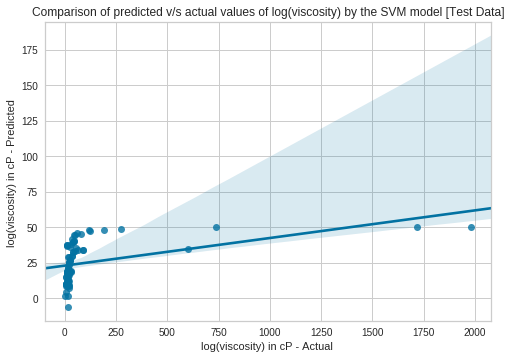

In [347]:
ax = sb.regplot(x=y_test,y=psvm_test)
ax.set_title('Comparison of predicted v/s actual values of log(viscosity) by the SVM model [Test Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

[Text(0, 0.5, 'log(viscosity) in cP - Predicted '),
 Text(0.5, 0, 'log(viscosity) in cP - Actual ')]

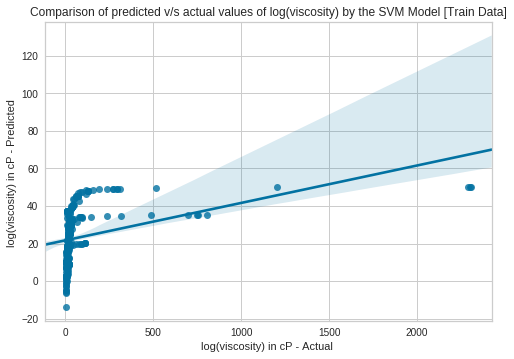

In [348]:
ax = sb.regplot(x=y_train,y=psvm_train)
ax.set_title('Comparison of predicted v/s actual values of log(viscosity) by the SVM Model [Train Data]')
ax.set(xlabel = 'log(viscosity) in cP - Actual ',ylabel = 'log(viscosity) in cP - Predicted ')

**Result:** ANN (Artificial Neural Network) model performed the best of all algorithms.